In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans


In [2]:
dataset = pd.read_csv('agrupamento_Q1.csv')

In [26]:
dataset.iloc[:,:].head()

,X1,X2,X3,X4
0,-0.075701,0.470857,0.133139,-0.152900
1,-0.328561,0.427323,-0.181237,-0.173041
2,-0.470727,-0.150515,0.000954,0.070937
3,-0.280037,-0.250587,-0.216587,-0.372430
4,-0.139359,-0.124966,0.081284,0.083914


# Definindo valores de K a serem testados 

In [44]:
all_k = range(2,21)
  

In [4]:
centroids = pd.read_csv('agrup_centroides_Q1.csv')

In [5]:
centroids.head()

,Unnamed: 0,X1,X2,X3,X4
0,1,1.488531,-0.430586,0.208942,0.018485
1,2,0.149391,1.549535,0.219688,0.917854
2,3,1.276714,0.844500,1.211906,-0.494781
3,4,-0.224172,-0.265252,1.004367,-0.209741
4,5,0.059576,0.946101,1.114006,0.401051


# Elbow Method 

In [34]:
from sklearn import metrics
from scipy.spatial.distance import cdist

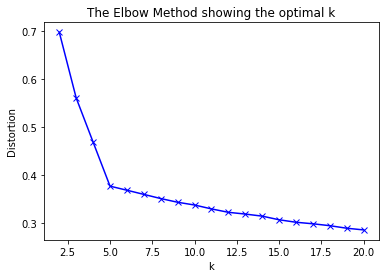

In [45]:
distortions = []
K = all_k
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(dataset)
    kmeanModel.fit(dataset)
    distortions.append(sum(np.min(cdist(dataset, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / dataset.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

# Silhouette Score

Automatically created module for IPython interactive environment
For n_clusters = 2 The average silhouette_score is : 0.37769968946322263
For n_clusters = 3 The average silhouette_score is : 0.4311863724028486
For n_clusters = 4 The average silhouette_score is : 0.4427185062742237
For n_clusters = 5 The average silhouette_score is : 0.48701214584287533
For n_clusters = 6 The average silhouette_score is : 0.4231290063837738
For n_clusters = 7 The average silhouette_score is : 0.36414576547811894
For n_clusters = 8 The average silhouette_score is : 0.29026848595540394
For n_clusters = 9 The average silhouette_score is : 0.24896734870071086
For n_clusters = 10 The average silhouette_score is : 0.2223683834012278
For n_clusters = 11 The average silhouette_score is : 0.1889658452161078
For n_clusters = 12 The average silhouette_score is : 0.18488000604632623
For n_clusters = 13 The average silhouette_score is : 0.19298984580932574
For n_clusters = 14 The average silhouette_score is : 0.1923

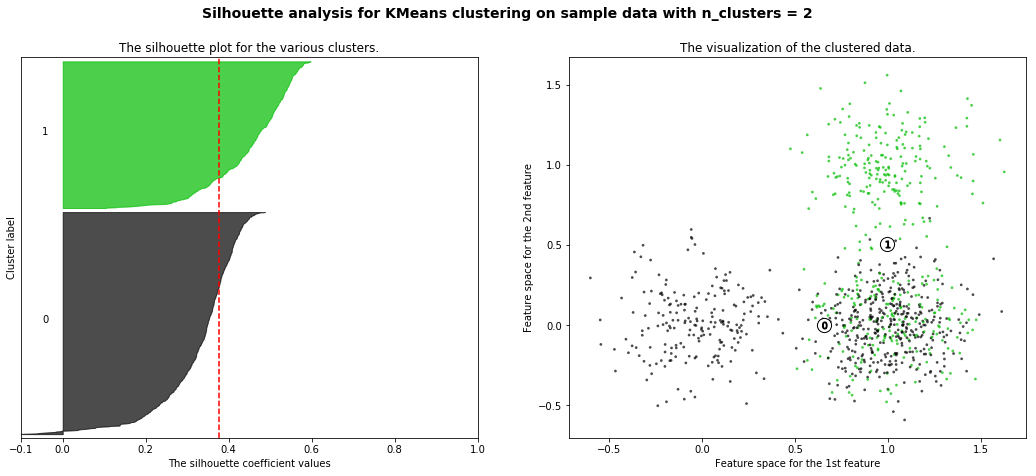

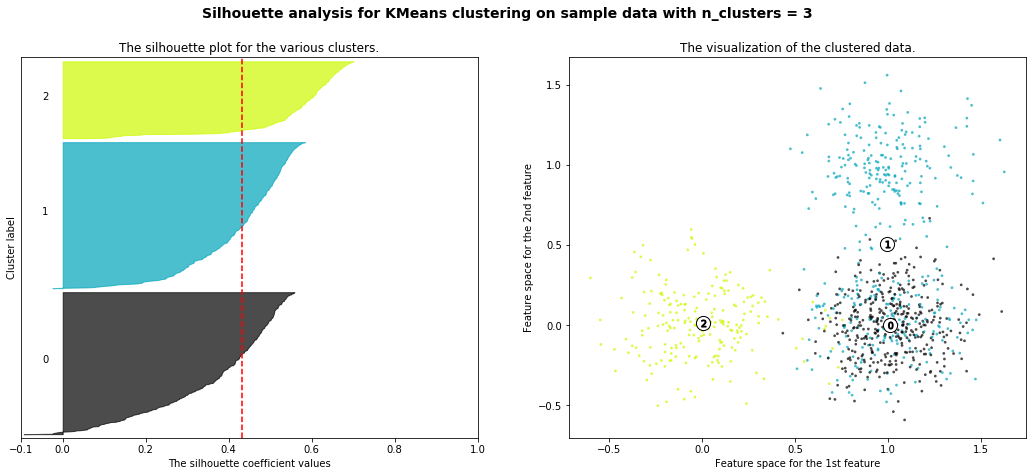

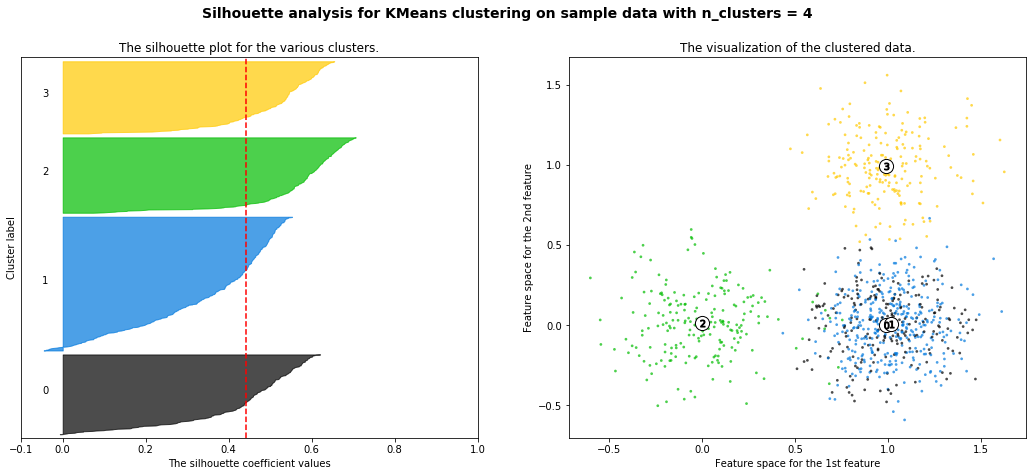

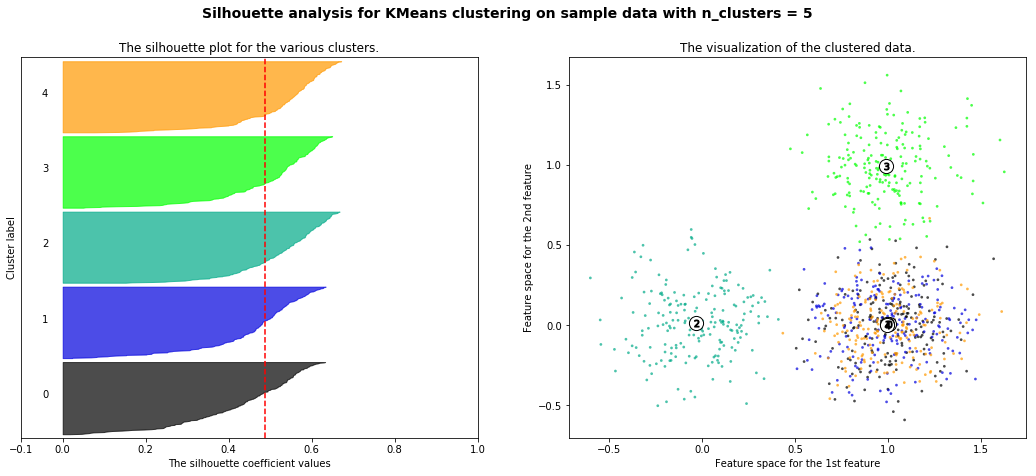

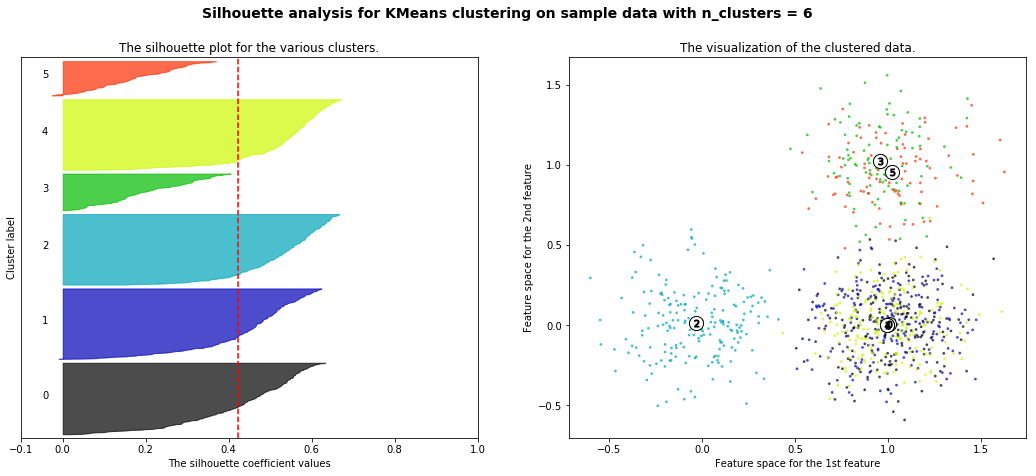

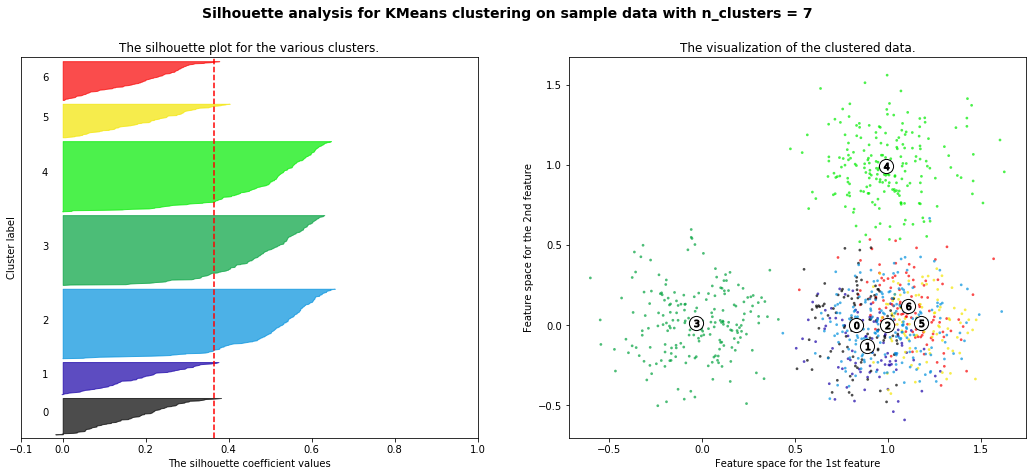

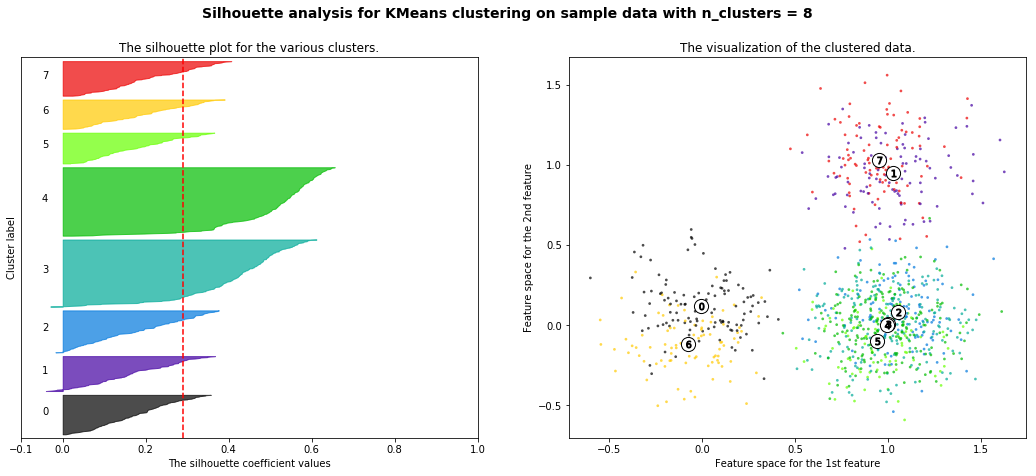

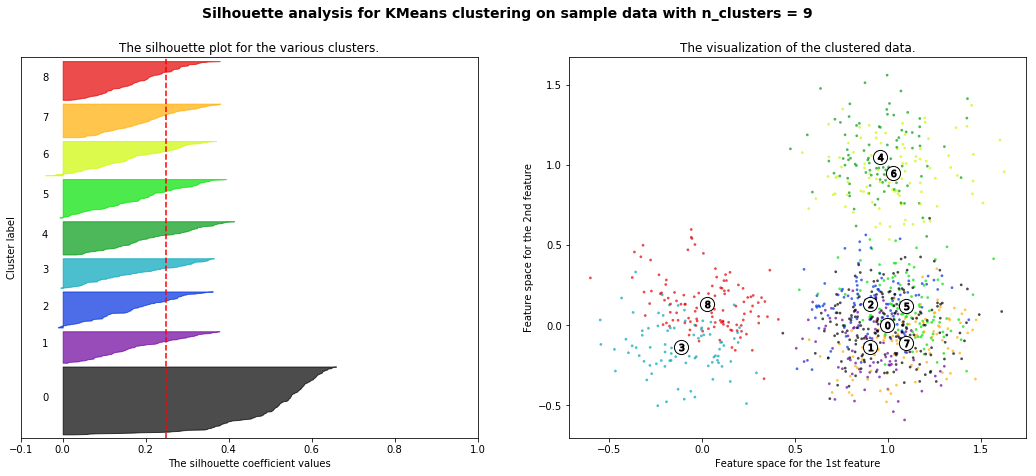

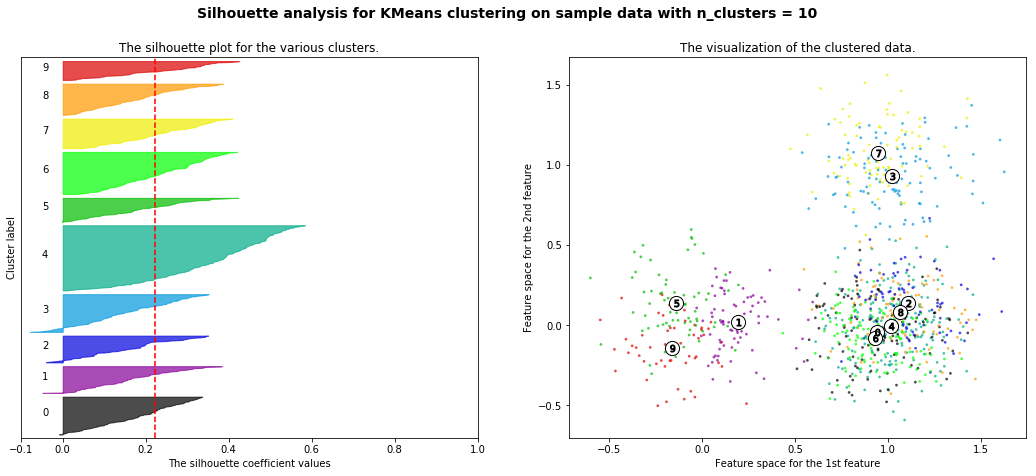

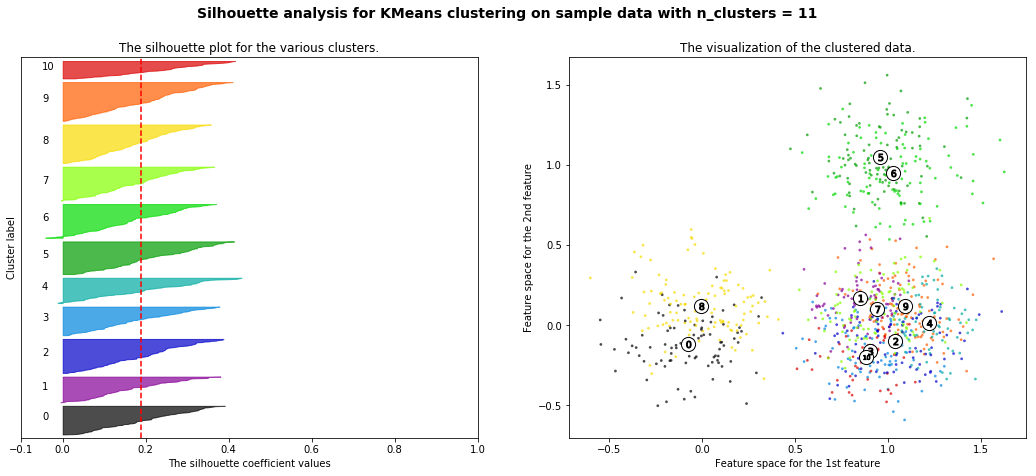

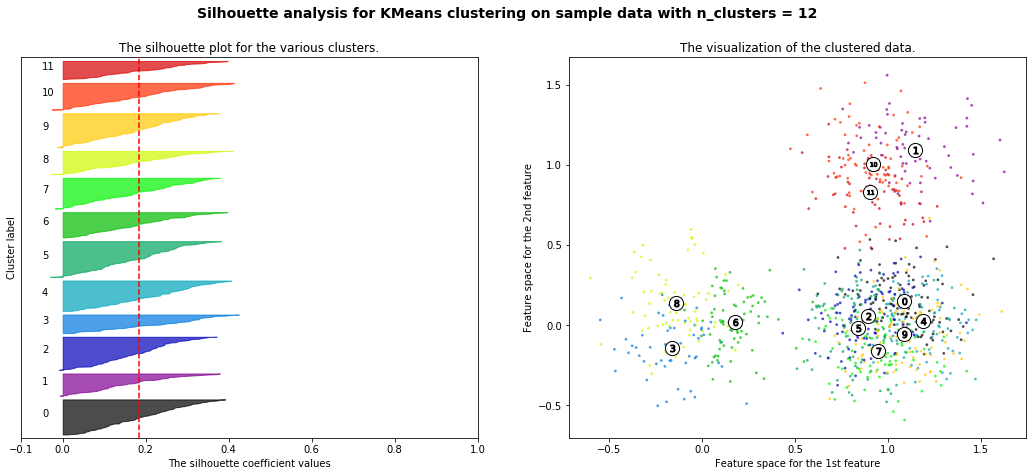

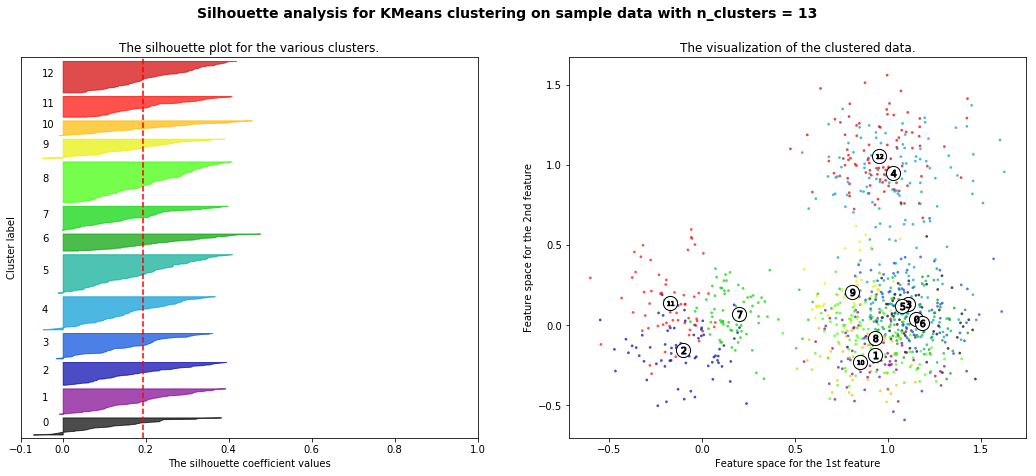

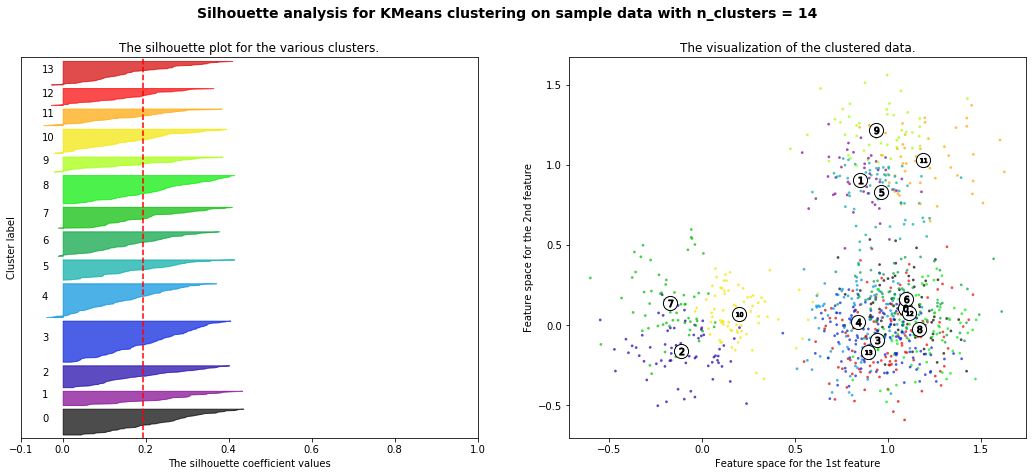

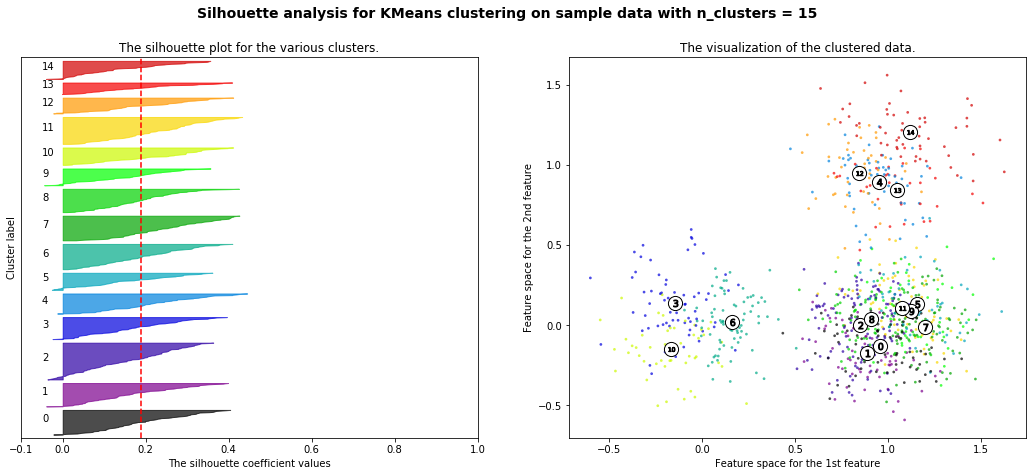

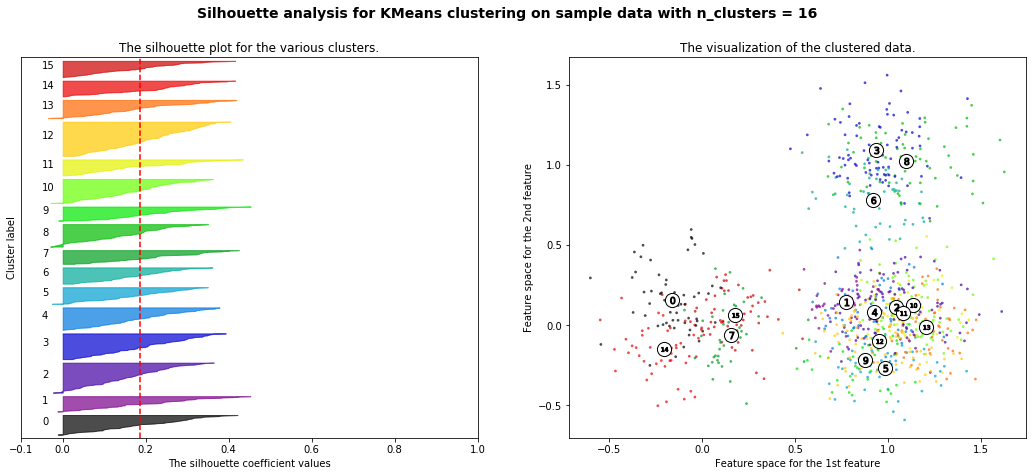

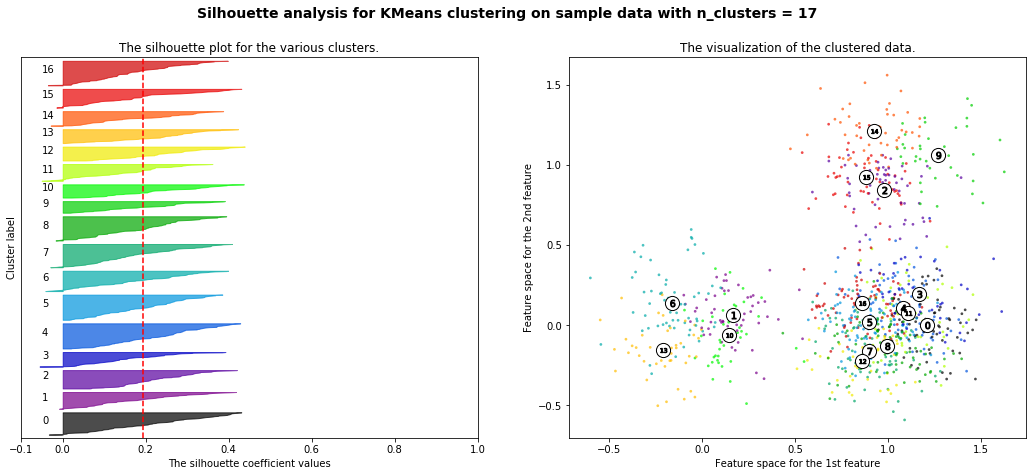

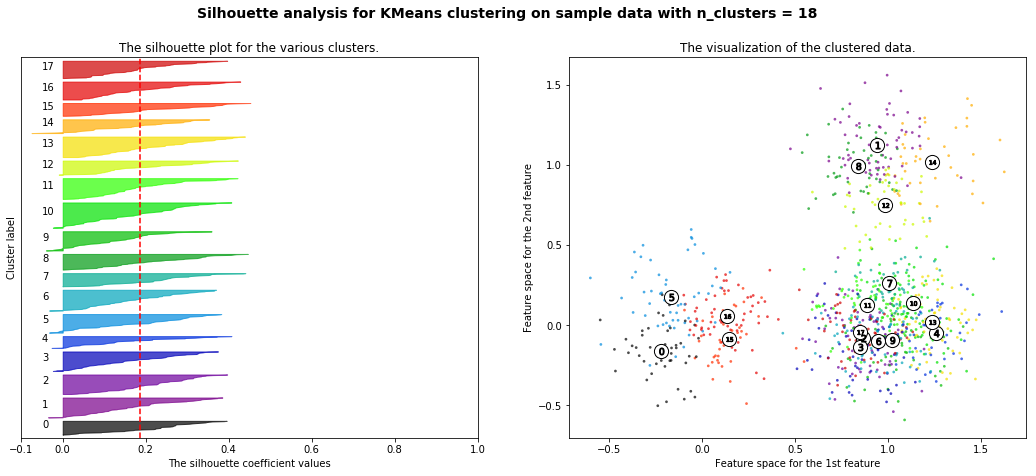

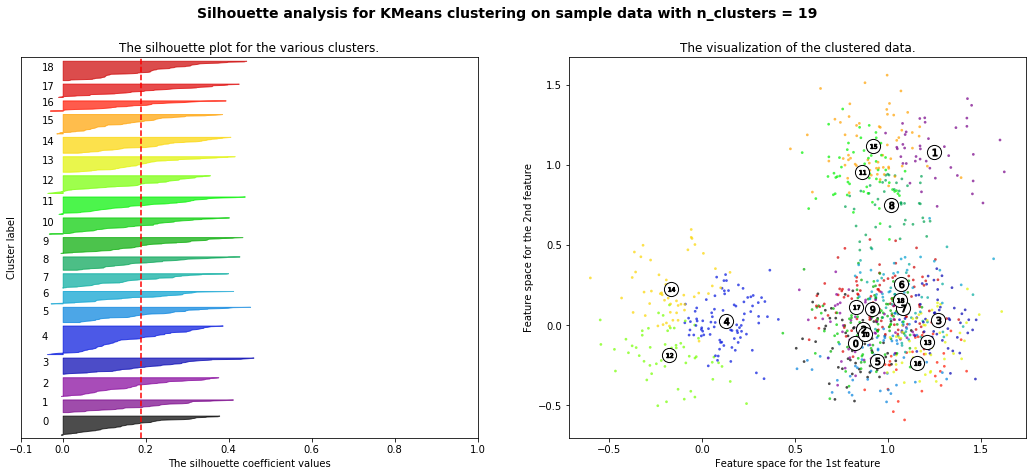

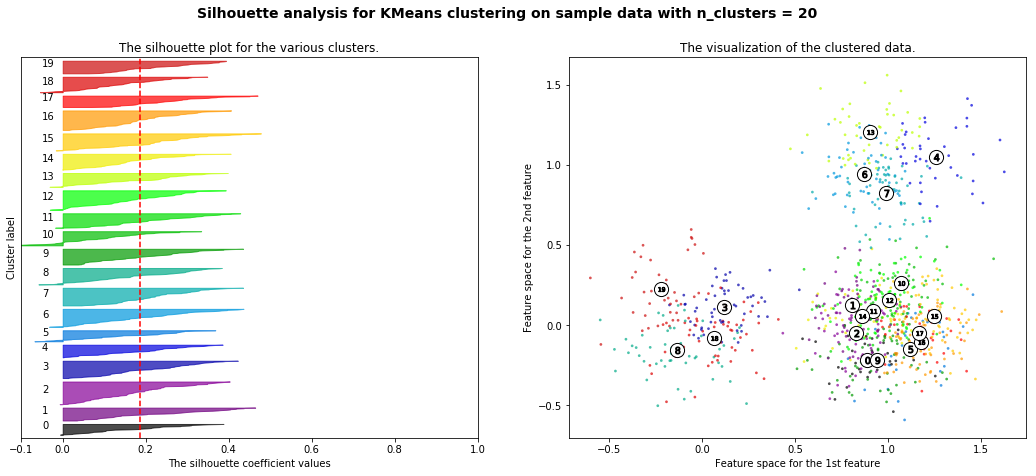

In [46]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
print(__doc__)


range_n_clusters = all_k
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(dataset) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(dataset)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(dataset, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(dataset, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(dataset.iloc[:, 0], dataset.iloc[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

In [33]:
'''tuplas = [[1,1],
         [1,2],
         [2,1],
         [2,2],
         [5,1],
         [6,1],
         [5,2]]
print(tuplas)'''

'tuplas = [[1,1],\n         [1,2],\n         [2,1],\n         [2,2],\n         [5,1],\n         [6,1],\n         [5,2]]\nprint(tuplas)'

# Definindo num de clusters e cortando os centroides iniciais do dataframe 

In [31]:
num_clusters = 5
startpts = centroids.iloc[:5,1:].values
print(startpts)

[[ 1.4885313  -0.43058596  0.20894176  0.01848519]
 [ 0.14939142  1.54953478  0.21968763  0.91785448]
 [ 1.27671379  0.84449994  1.21190625 -0.49478136]
 [-0.22417162 -0.26525233  1.00436711 -0.20974068]
 [ 0.05957565  0.94610149  1.11400584  0.4010512 ]]


# Calculando a posição dos Centroids apos X iterações com Y clusters

In [37]:
Y = 5
X = 10

In [39]:
kmeans = KMeans(n_clusters=Y, init=startpts, max_iter=X)
kmeans.fit(dataset)
kmeans.cluster_centers_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:896: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return_n_iter=True)


array([[ 1.00809727e+00,  5.65625680e-03, -6.05882233e-03,
         2.93292716e-02],
       [ 9.95561737e-01,  6.26153151e-04, -7.80409753e-03,
         1.00152120e+00],
       [ 9.95952697e-01,  6.46273222e-03,  9.99718008e-01,
         3.14721258e-03],
       [-3.47147275e-02,  1.63162909e-02,  1.04264751e-02,
        -1.62407503e-02],
       [ 9.90740088e-01,  9.93047773e-01,  9.69936615e-01,
        -4.06482259e-03]])

In [40]:
y_kmeans = kmeans.predict(dataset)